In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
taxi = pd.read_csv('2_taxi_nyc.csv')
taxi = taxi.rename(columns={'pcp 01': 'pcp_01', 'pcp 06': 'pcp_06', 'pcp 24': 'pcp_24', 'temp': 'temp_Fahrenheit'})

taxi.shape
taxi.head()

,pickup_dt,pickup_month,borough,pickups,hday,spd,vsb,temp_Fahrenheit,dewp,slp,pcp_01,pcp_06,pcp_24,sd
0,2015-01-01 01:00:00,Jan,Bronx,152,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
1,2015-01-01 01:00:00,Jan,Brooklyn,1519,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
2,2015-01-01 01:00:00,Jan,EWR,0,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
3,2015-01-01 01:00:00,Jan,Manhattan,5258,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
4,2015-01-01 01:00:00,Jan,Queens,405,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0


In [76]:
# How often does "Brooklyn" appear in the data?

taxi.query("borough == 'Brooklyn'").shape[0]

4343

In [77]:
# Where did the most of the trips start?
pickups_by_borough = (taxi.groupby('borough', as_index = False) 
                          .agg({'pickups': 'sum'})
                          .sort_values('pickups', ascending = False))

pickups_by_borough

,borough,pickups
3,Manhattan,10367841
1,Brooklyn,2321035
4,Queens,1343528
0,Bronx,220047
5,Staten Island,6957
2,EWR,105


In [78]:
# Select boroughs that receive more orders on average during holidays than on regular days

pickups_by_borough_by_hday = (taxi.groupby(['borough', 'hday']) 
                                  .pickups.mean()
                                  .unstack())

# Table with average number of orders (column "N" for workdays and column "Y" for holidays)
pickups_by_borough_by_hday

hday,N,Y
borough,,
Bronx,50.771073,48.065868
Brooklyn,534.727969,527.011976
EWR,0.023467,0.041916
Manhattan,2401.302921,2035.928144
Queens,308.899904,320.730539
Staten Island,1.606082,1.497006


In [79]:
grouped = pickups_by_borough_by_hday
grouped[grouped['Y'] > grouped['N']]

hday,N,Y
borough,,
EWR,0.023467,0.041916
Queens,308.899904,320.730539


In [80]:
# Add new column for difference between average orders on holidays and workdays

pickups_by_borough_by_hday['Y - N'] = pickups_by_borough_by_hday['Y'] - pickups_by_borough_by_hday['N']

pickups_by_borough_by_hday.sort_values(by = 'Y - N', ascending = False)

hday,N,Y,Y-N
borough,,,
Queens,308.899904,320.730539,11.830635
EWR,0.023467,0.041916,0.018449
Staten Island,1.606082,1.497006,-0.109076
Bronx,50.771073,48.065868,-2.705205
Brooklyn,534.727969,527.011976,-7.715993
Manhattan,2401.302921,2035.928144,-365.374778


In [81]:
# Calculate the number of trips by month for each borough

pickups_by_mon_bor = (taxi.groupby(['borough', 'pickup_month'], as_index = False) 
                          .pickups.sum()
                          .sort_values(by = 'pickups', ascending = False))
pickups_by_mon_bor.head()

,borough,pickup_month,pickups
21,Manhattan,Jun,1995388
23,Manhattan,May,1888800
19,Manhattan,Feb,1718571
22,Manhattan,Mar,1661261
18,Manhattan,Apr,1648278


In [82]:
# Convert temperature in Fahrenheit to Celsius
def temp_to_celcius(column: pd.Series):
    return (column - 32) * 5 / 9 

taxi['temp_Celcius'] = temp_to_celcius(taxi['temp_Fahrenheit'])

In [2]:
taxi_Peru = pd.read_csv('taxi_peru.csv', sep = ';', parse_dates = ['start_at', 'end_at', 'arrived_at'])

taxi_Peru.shape

(23111, 19)

In [24]:
# Distribution of Sources (in %)

taxi_Peru.groupby('source') \
         .journey_id.count() / taxi_Peru.shape[0] * 100

source
Android    21.240968
Wap         0.588464
iPad        2.470685
iPhone     42.148760
web        33.018909
Name: journey_id, dtype: float64

In [4]:
# Distribution of Sources (in absolute values)

(taxi_Peru.source.value_counts()
                 .reset_index())

,source,count
0,iPhone,9741
1,web,7631
2,Android,4909
3,iPad,571
4,Wap,136


In [5]:
# Alternative way to get Distribution of Sources (in absolute values)

orders_by_source = taxi_Peru.groupby('source', as_index = False) \
         .journey_id.count() \
         .sort_values(by = 'journey_id', ascending = False)

orders_by_source

,source,journey_id
3,iPhone,9741
4,web,7631
0,Android,4909
2,iPad,571
1,Wap,136


<Axes: xlabel='source', ylabel='journey_id'>

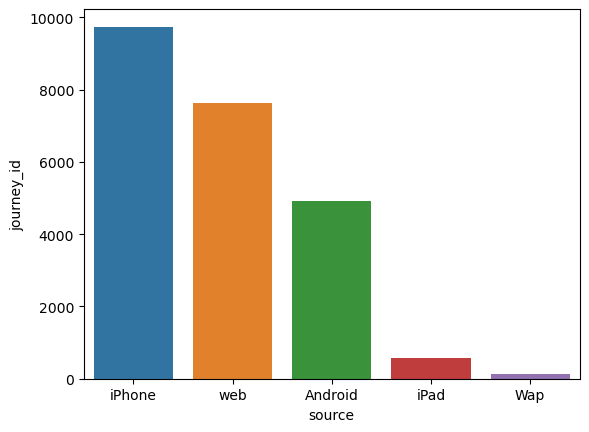

In [9]:
# Barplot for source distribution (in absolute values)

sns.barplot(x = 'source', y = 'journey_id', data = orders_by_source)

<Axes: xlabel='source', ylabel='count'>

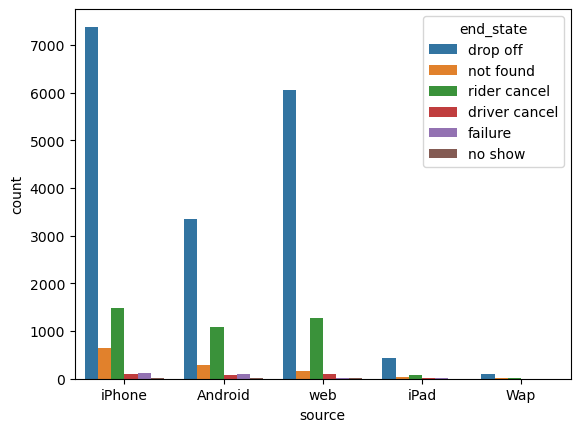

In [10]:
# Barplot for source and end_state distribution (in absolute values)

sns.countplot(x ='source', data = taxi_Peru, hue = 'end_state')

In [17]:
# Distribution of drivers' scores (in absolute values)

taxi_Peru.driver_score.value_counts()

driver_score
5.0    4499
4.0    1674
0.0    1094
3.0     227
1.0      94
2.0      62
Name: count, dtype: int64

In [19]:
# Distribution of drivers' scores (in %)

driver_score_counts = (taxi_Peru.driver_score.value_counts()
                       .mul(100 / taxi_Peru.driver_score.count())
                       .round(2)
                       .reset_index()
                       .rename(columns = {'count':'percentage', 'index': 'driver_score'})
                       .sort_values(by = 'driver_score'))

driver_score_counts

,driver_score,percentage
2,0.0,14.30
4,1.0,1.23
5,2.0,0.81
3,3.0,2.97
1,4.0,21.88
0,5.0,58.81


In [32]:
# Alternative way to get Distribution of drivers' scores (in %)

(taxi_Peru.driver_score.value_counts(normalize = True)
                       .mul(100)
                       .round(2))

driver_score
5.0    58.81
4.0    21.88
0.0    14.30
3.0     2.97
1.0     1.23
2.0     0.81
Name: proportion, dtype: float64

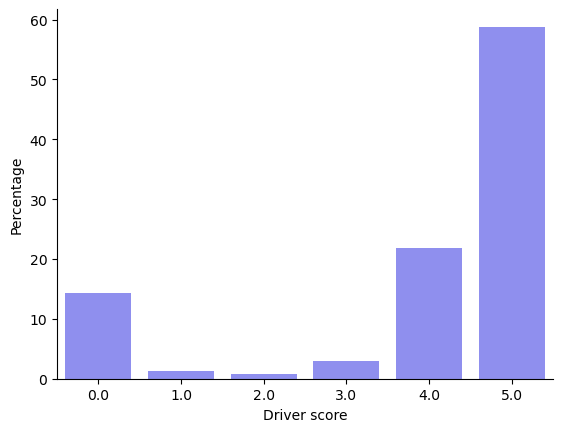

In [23]:
# Barplot for distribution of drivers' scores (in %)

ax = sns.barplot(x = 'driver_score', y = 'percentage', data = driver_score_counts, color = 'blue', alpha = 0.5)
ax.set(xlabel ='Driver score', ylabel ='Percentage')
sns.despine() 
plt.show()

In [28]:
# Distribution of riders' scores (in %)

rider_score_counts = (taxi_Peru.rider_score.value_counts(normalize = True)
                       .mul(100)
                       .round(2)
                       .reset_index()
                       .rename(columns = {'proportion':'percentage', 'index': 'rider_score'})
                       .sort_values(by = 'rider_score'))

rider_score_counts

,rider_score,percentage
2,0.0,2.29
4,1.0,0.21
5,2.0,0.19
3,3.0,1.38
1,4.0,8.83
0,5.0,87.10


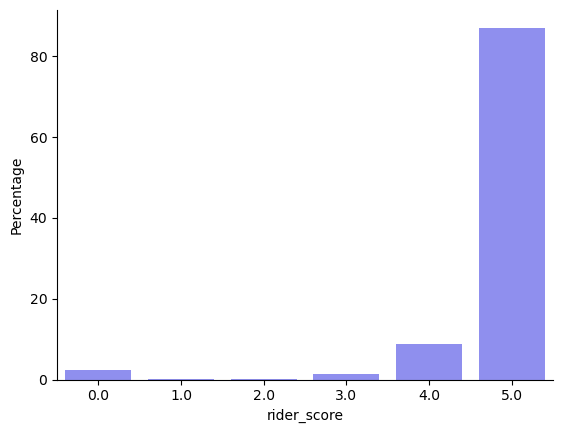

In [29]:
# Barplot for distribution of riders' scores (in %)

ax = sns.barplot(x = 'rider_score', y = 'percentage', data = rider_score_counts, color = 'blue', alpha = 0.5)
ax.set(xlabel ='rider_score', ylabel ='Percentage')
sns.despine() 
plt.show()